#### ISM5935 - Fundamentals of Data Visualization
--------------------------
# Class Demo:<br> <span style="color:#960018">*MATPLOTLIB 4* </span>

(SOURCE: *Effectively Using MATPLOTLIB*, by Chris Moffitt (https://pbpython.com/effective-matplotlib.html)

"If you take nothing else away from this post, I recommend the following steps for learning how to use matplotlib:

* Learn the basic matplotlib terminology, specifically what is a Figure and an Axes .
* Always use the object-oriented interface. Get in the habit of using it from the start of your analysis.
* Start your visualizations with basic pandas plotting.
* Use seaborn for the more complex statistical visualizations.
* Use matplotlib to customize the pandas or seaborn visualization.


"Most of the terms are straightforward but the main thing to remember is that the **Figure** is the final image that may contain 1 or more axes. The **Axes** represent an individual plot. Once you understand what these are and how to access them through the object oriented API, the rest of the process starts to fall into place.

"The other benefit of this knowledge is that you have a starting point when you see things on the web. If you take the time to understand this point, the rest of the matplotlib API will start to make sense. Also, many of the advanced python packages like seaborn and ggplot rely on matplotlib so understanding the basics will make those more powerful frameworks much easier to learn.

"Finally, I am not saying that you should avoid the other good options like *ggplot (aka ggpy)*, *bokeh*, *plotly* or *altair*. I just think you’ll need a basic understanding of **matplotlib + pandas + seaborn** to start. Once you understand the basic visualization stack, you can explore the other options and make informed choices based on your needs.

In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
# Ensure plots are displayed inline
%matplotlib inline
#%matplotlib notebook

In [3]:
# Read in some data to show some real world examples
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")

In [4]:
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


"The data consists of sales transactions for 2014. In order to make this post a little shorter, I’m going to summarize the data so we can see the total number of purchases and total sales for the top 10 customers. I am also going to rename columns for clarity during plots."

Summarize the data by customer and get the top 10 customers. Also, clean up the column names for consistency

In [5]:
top_10 = (df.groupby('name')['ext price', 'quantity'].agg({'ext price': 'sum', 'quantity': 'count'})
          .sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [6]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


"Now that the data is formatted in a simple table, let’s talk about plotting these results as a bar chart.

"As I mentioned earlier, matplotlib has many different styles available for rendering plots. You can see which ones are available on your system using `plt.style.available` ."


Look at available styles

In [7]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

Use the ggplot style to improve the overall esthetics.

In [8]:
plt.style.use('ggplot')

"Now that we have a nicer style in place, the first step is to plot the data using the standard pandas plotting function:"

Basic pandas plot to get started

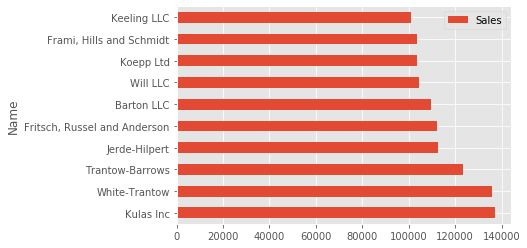

In [9]:
top_10.plot(kind='barh', y="Sales", x="Name");

REMINDER:  Why put ";" at end of previous statement?

(from Eric Gentry at Google Groups) "If you end a notebook cell with a function, but don't assign the result to a variable, the notebook will display the result as the output of the cell.

"In this case, you ended the cell with the function "ylabel('Gamma')", which returns an object of type matplotlib.text.Text. (It's a little confusing because the "ylabel" function both changes the current figure and returns a new object)  You did not assign the function result to a variable, so it displays the result as the cell output (in addition to the figure).  The same thing happens for function results in the standard python shell -- if you enter the line "ylabel('Gamma')", it will show "<matplotlib.text.Text ... >"

"Usually it does not cause any trouble, but if you really want to suppress the output you can:
* put a semi-colon at the end of the last line: "ylabel('Gamma');"
* assign the result of the function to a variable: "_ = ylabel('Gamma')"   (where "_" is a common name for a variable you don't want to use later)

"The reason I recommend using pandas plotting first is that it is a quick and easy way to prototype your visualization. Since most people are probably already doing some level of data manipulation/analysis in pandas as a first step, go ahead and use the basic plots to get started."

### Customizing the Plot
"Assuming you are comfortable with the gist of this plot, the next step is to customize it. Some of the customizations (like adding titles and labels) are very simple to use with the `pandas` plot function. However, you will probably find yourself needing to move outside of that functionality at some point. That’s why I recommend getting in the habit of doing this:"

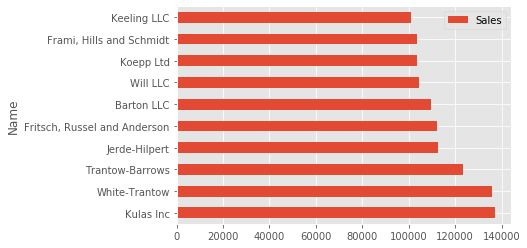

In [10]:
#Get the figure and axes for future customization
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax);

"The resulting plot looks exactly the same as the original but we added an additional call to `plt.subplots()` and passed the `ax` to the plotting function. Why should you do this? Remember when I said it is critical to get access to the axes and figures in matplotlib? That’s what we have accomplished here. Any future customization will be done via the `ax` or `fig` objects.

We have the benefit of a quick plot from pandas but access to all the power from matplotlib now. An example should show what we can do now. Also, by using this naming convention, it is fairly straightforward to adapt others’ solutions to your unique needs.

Suppose we want to tweak the x limits and change some axis labels? Now that we have the axes in the `ax` variable, we have a lot of control:"

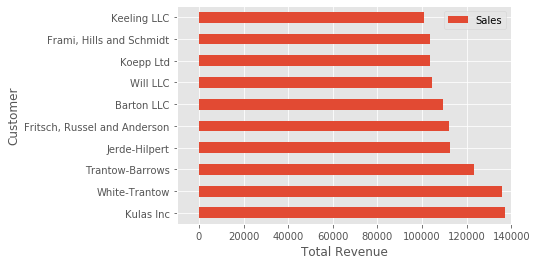

In [11]:
#Set some limits and labels
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set_xlabel('Total Revenue')
ax.set_ylabel('Customer');

"Here’s another shortcut we can use to change the title and both labels:"

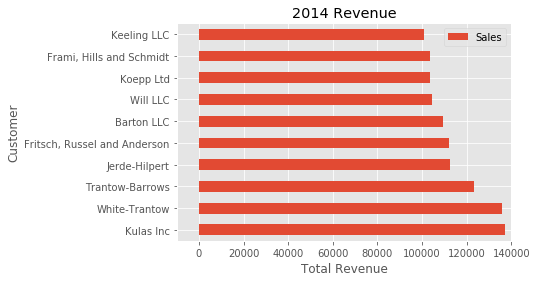

In [12]:
#Alternative api using set
fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer');

"To further demonstrate this approach, we can also adjust the size of this image. By using the `plt.subplots()` function, we can define the `figsize` in inches. We can also remove the legend using `ax.legend().set_visible(False)`

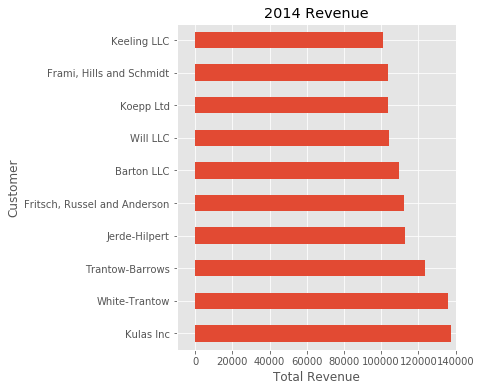

In [13]:
# Hide the legend since it is not useful in this case. Also change the size of the image.

fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.legend().set_visible(False)

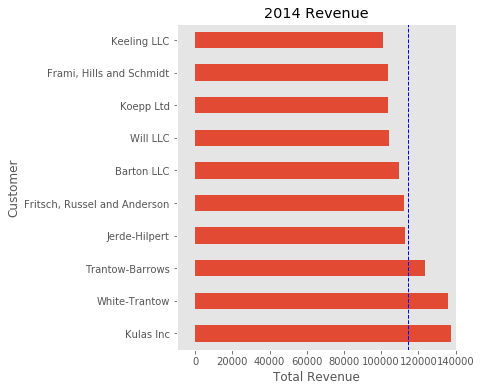

In [14]:
# Add some annotations, and turn off the grid - just to show how it is done

fig, ax = plt.subplots(figsize=(5, 6))
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax.grid(False)
ax.legend().set_visible(False)

"There are plenty of things you probably want to do to clean up this plot. One of the biggest eye sores is the formatting of the Total Revenue numbers. Matplotlib can help us with this through the use of the `FuncFormatter` . This versatile function can apply a user defined function to a value and return a nicely formatted string to place on the axis.

"Here is a currency formatting function to gracefully handle US dollars in the several hundred thousand dollar range:"

In [15]:
# To clean up the currency in Total Revenue, we define a custom formatting function

def currency(x, pos):
    'The two args are the value and tick position'
    if x >= 1000000:
        return '${:1.1f}M'.format(x*1e-6)
    return '${:1.0f}K'.format(x*1e-3)

"Now that we have a formatter function, we need to define it and apply it to the x axis. Here is the full code:"

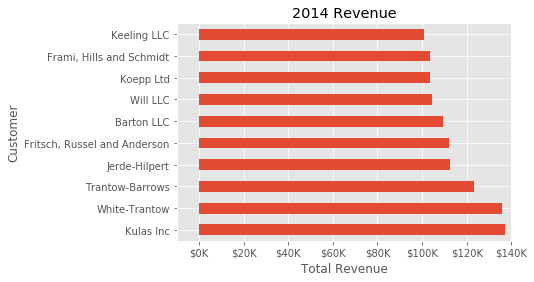

In [16]:
# Use the new formatter

fig, ax = plt.subplots()
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

"That’s much nicer and shows a good example of the flexibility to define your own solution to the problem.

"The final customization feature I will go through is the ability to add annotations to the plot. In order to draw a vertical line, you can use ax.axvline() and to add custom text, you can use ax.text() .

"For this example, we’ll draw a line showing an average and include labels showing three new customers. Here is the full code with comments to pull it all together."

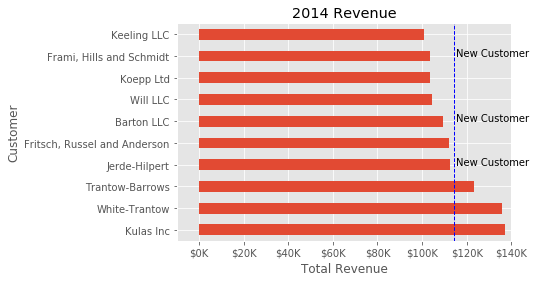

In [25]:
## Fully commented example

# Create the figure and the axes
fig, ax = plt.subplots()

# Plot the data and get the averaged
top_10.plot(kind='barh', y="Sales", x="Name", ax=ax)
avg = top_10['Sales'].mean()

# Set limits and labels
ax.set_xlim([-10000, 140000])
ax.set(title='2014 Revenue', xlabel='Total Revenue', ylabel='Customer')

# Add a line for the average
ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

# Annotate the new customers
for cust in [3, 5, 8]:
    ax.text(115000, cust, "New Customer")
# Format the currency
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)

# Hide the legend
ax.legend().set_visible(False);

While this may not be the most exciting plot it does show how much power you have when following this approach.

## Figures and Plots
"Up until now, all the changes we have made have been with the indivudual plot. Fortunately, we also have the ability to add **multiple plots** on a figure as well as **save** the entire figure using various options.

"If we decided that we wanted to put two plots on the same figure, we should have a basic understanding of how to do it. First, create the figure, then the axes, then plot it all together. We can accomplish this using `plt.subplots()` :

`fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))`

"In this example, I’m using `nrows` and `ncols` to specify the size because this is very clear to the new user. In sample code you will frequently just see variables like 1,2. I think using the named parameters is a little easier to interpret later on when you’re looking at your code.

"I am also using `sharey=True` so that the yaxis will share the same labels.

"This example is also kind of nifty because the various axes get unpacked to `ax0` and `ax1` . Now that we have these axes, you can plot them like the examples above but put one plot on `ax0` and the other on `ax1` ."

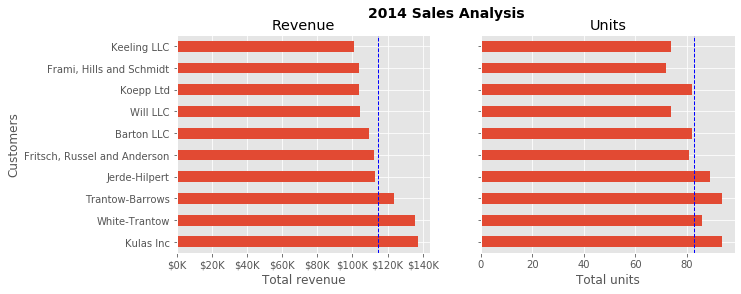

In [18]:
## Add two plots to a figure

# Get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10,4))

# Build the first plot
top_10.plot(kind='barh', x='Name', y='Sales', ax=ax0)
ax0.set(title='Revenue', xlabel='Total revenue', ylabel='Customers')
formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)

# Add average line to the first plot
revenue_average = top_10['Sales'].mean()
ax0.axvline(x=revenue_average, color='b', label='Average', linestyle='--', linewidth=1)

# Build the second plot
top_10.plot(kind='barh', x='Name', y='Purchases', ax=ax1)
ax1.set(title='Units', xlabel='Total units', ylabel='')

# Add average line to the second plot
purchases_average = top_10['Purchases'].mean()
ax1.axvline(x=purchases_average, color='b', label='Average', linestyle='--', linewidth=1)

# Title the figure
fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

# Hide the plot legends
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

## Saving Files
"Up until now, I have been relying on the jupyter notebook to display the figures by virtue of the `%matplotlib inline` directive. However, there are going to be plenty of times where you have the need to save a figure in a specific format and integrate it with some other presentation.

Matplotlib supports many different formats for saving files. You can use `fig.canvas.get_supported_filetypes()` to see what your system supports:

In [19]:
# Let's look at how to save the files
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Since we have the `fig` object, we can save the figure using multiple options:

In [20]:
fig.savefig('sales.png', transparent=False, dpi=80, bbox_inches="tight")

This version saves the plot as a png with opaque background. I have also specified the dpi and `bbox_inches="tight"` in order to minimize excess white space.

Display the file to see what it looks like

In [21]:
from IPython.display import Image

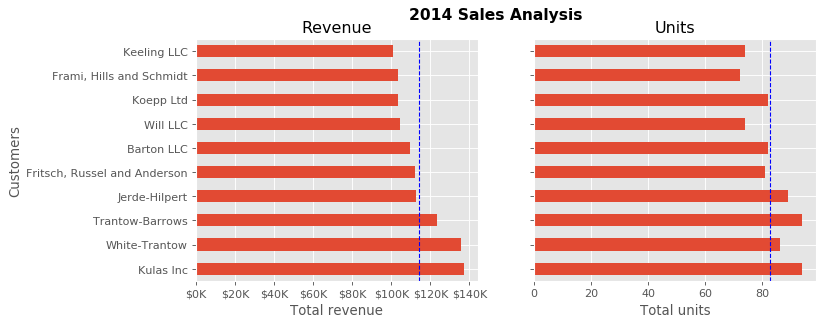

In [22]:
Image('sales.png')

## Conclusion
"Hopefully this process has helped you understand how to more effectively use matplotlib in your daily data analysis. If you get in the habit of using this approach when doing your analysis, you should be able to quickly find out how to do whatever you need to do to customize your plot.

"As a final bonus, I am including a quick guide to unify all the concepts. I hope this helps bring this post together and proves a handy reference for future use.

<img src="matplotlib customization example.png"
     alt="missing data" height = "800"
     align = "left" />